# Figure 8 Plot

In this notebook we plot both the heteroclinic orbits and the instantons for various values of alpha.

In [1]:
# Standard Package imports
import numpy as np
import numpy.linalg as la
import numpy.random as rm

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import seaborn as sns

import matplotlib as mpl
import seaborn as sns
cp = sns.color_palette("tab10")
cp

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Loading Data

In [8]:
import os
import pickle
import xarray as xr

In [20]:
# MAM Results

c2s_mam = []
h2s_mam = []

# Cold to Saddle Instantons

wd = 'Data/varying-alpha/cold-to-saddle/'
files = os.listdir(wd)
files.sort()
for s in files:
    with open(wd + s, 'rb') as file:
        print(f'Opening {wd + s}')
        c2s_mam.append(pickle.load(file))
        

# Hot to Saddle Instantons
wd = 'Data/varying-alpha/hot-to-saddle/'
files = os.listdir(wd)
files.sort()
for s in files:
    with open(wd + s, 'rb') as file:
        print(f'Opening {wd + s}')
        h2s_mam.append(pickle.load(file))

Opening Data/varying-alpha/cold-to-saddle/alpha_0_00.pickle
Opening Data/varying-alpha/cold-to-saddle/alpha_0_25.pickle
Opening Data/varying-alpha/cold-to-saddle/alpha_0_50.pickle
Opening Data/varying-alpha/cold-to-saddle/alpha_1_00.pickle
Opening Data/varying-alpha/hot-to-saddle/alpha_0_00.pickle
Opening Data/varying-alpha/hot-to-saddle/alpha_0_25.pickle
Opening Data/varying-alpha/hot-to-saddle/alpha_0_50.pickle
Opening Data/varying-alpha/hot-to-saddle/alpha_1_00.pickle


In [11]:
# Heteroclinic Orbits

# Hot Relaxation
files = [f'../Deterministic-Model/Data/alpha{a}/hot-relaxation.nc' for a in ['0_0', '0_25', '0_5', '1_0']]
hot_het_orbits = [xr.open_dataset(f) for f in files]

# Cold Relaxation
files = [f'../Deterministic-Model/Data/alpha{a}/cold-relaxation.nc' for a in ['0_0', '0_25', '0_5', '1_0']]
cold_het_orbits = [xr.open_dataset(f) for f in files]

## Plotting Figure 8

In [35]:
# Function for Streamfield background

def fancy_well_background(alpha, ax):
    
    # Plot Misc
    ax.set_xlim((-1.5, 1.5))
    ax.set_ylim((-1, 1))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    
    # alpha label
    ax.text(-1.2, 0.8, fr'$\alpha = {alpha:.2f}$', fontsize=15, bbox={'facecolor': '1', 'pad': 10}) #

    # Gradient Arrows
    x = np.linspace(-1.5, 1.5, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    vx = X*(X**2 - 1) - 2 * alpha * Y 
    vy = alpha *X*(X**2 - 1) + 2 * Y 
    speed = np.sqrt(vx**2 + vy**2)
    ax.streamplot(x, y, -vx, -vy, color='1')
    ax.pcolormesh(X, Y, speed, cmap = 'Blues') 
    
    # Fixed Points
    marker_radius = 0.05
    cold_point = plt.Circle((-1, 0), marker_radius, color='b')
    hot_point = plt.Circle((1, 0), marker_radius, color='r')
    mid_point = plt.Circle((0, 0), marker_radius, color='g')
    ax.add_patch(cold_point)
    ax.add_patch(hot_point)
    ax.add_patch(mid_point)
    return ax

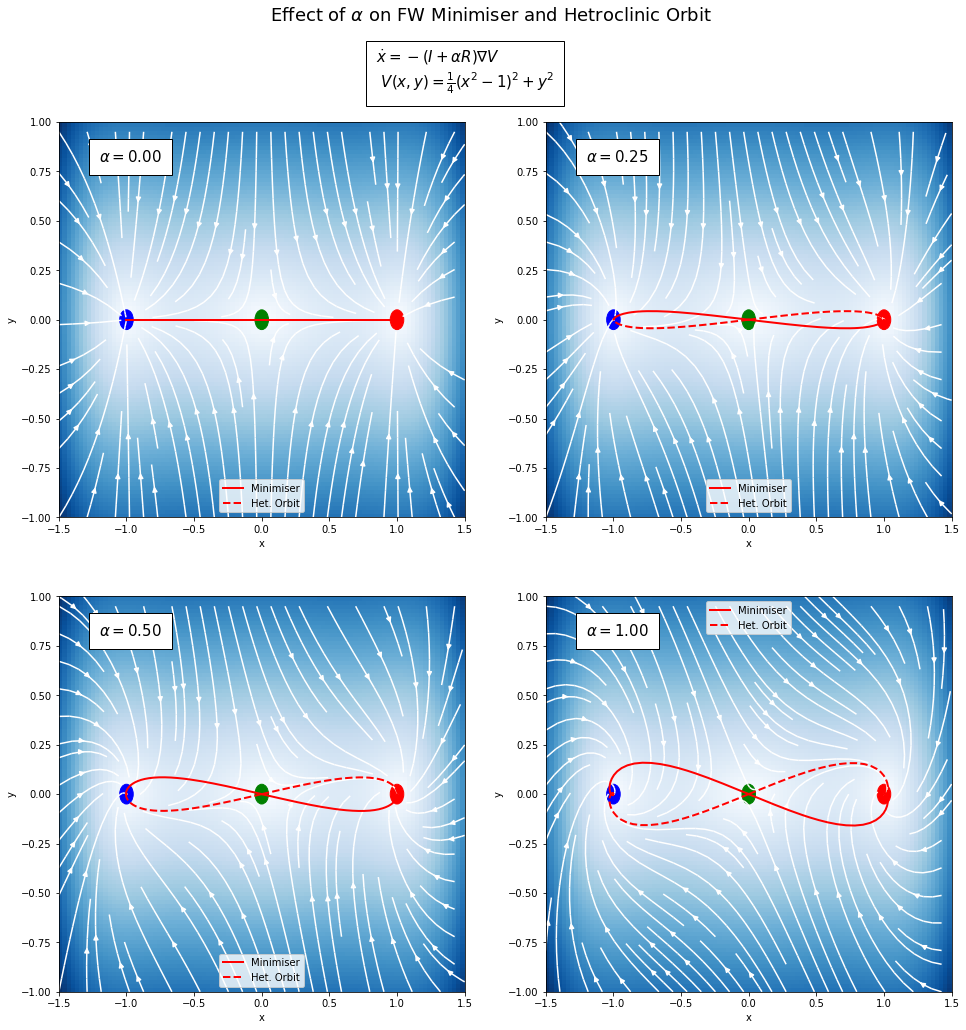

In [36]:
# Heteroclinic orbit vs. Minimiser Plot

fig, axes = plt.subplots(2, 2, figsize = (16, 16))

alphas = [0., 0.25, 0.5, 1.]


# Plot cold orbits
for k, ax in enumerate(axes.flatten()):
    m = c2s_mam[k]
    instanton = m['instanton']
    h = cold_het_orbits[k]
    ax.plot(instanton[:, 0], instanton[:, 1], 'r', lw=2)
    ax.plot(h.x, h.y,'r--', lw=2)
    
# Plot hot orbits
for k, ax in enumerate(axes.flatten()):
    m = h2s_mam[k]
    instanton = m['instanton']
    h = hot_het_orbits[k]
    ax.plot(instanton[:, 0], instanton[:, 1], 'r', lw=2, label='Minimiser')
    ax.plot(h.x, h.y,'r--', lw=2, label ='Het. Orbit')
    
# Plot Streamfield and markers

for a, ax in zip(alphas, axes.flatten()):
    fancy_well_background(a, ax)
    ax.legend()

title_string = "Effect of $\\alpha$ on FW Minimiser and Hetroclinic Orbit"
subtitle_string = "$\\dot{x} = - (I + \\alpha R)\\nabla V$\n $V(x, y) = \\frac{1}{4} (x^2 -1)^2 + y^2$"

fig.text(0.4,.91, subtitle_string, fontsize=15, bbox={'facecolor': '1', 'pad': 10}) #
fig.suptitle(title_string, fontsize=18)
fig.show()
# fig.savefig('alpha-effect.pdf')